# 사이킷런 버전 확인

In [1]:
import sklearn
print(sklearn.__version__)

1.3.2


# 붓꽃 품종 분류

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier #의사결정나무 분류기
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

## 데이터 로드

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
iris #딕셔너리형태로 값들이 담겨있음을 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
print(iris.data) #입력데이터

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
print(iris.target) #label 정답데이터

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


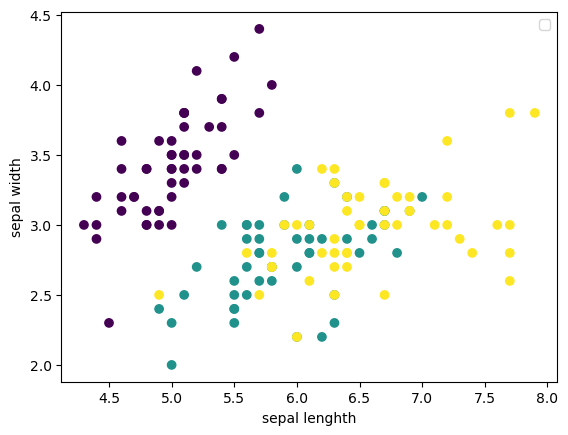

In [18]:
import matplotlib.pyplot as plt

#sepal lenght와 sepal width만 선택
X = iris.data[:, :2] #꽃받침 길이와 꽃받침 폭 데이터를 X변수에 할당
y = iris.target #꽃의 품종을 나타내는 레이블 데이터를 y변수에 할당

# print(X)
# print(y)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel("sepal lenghth")
plt.ylabel("sepal width")
plt.legend()
plt.show()

['setosa' 'versicolor' 'virginica']


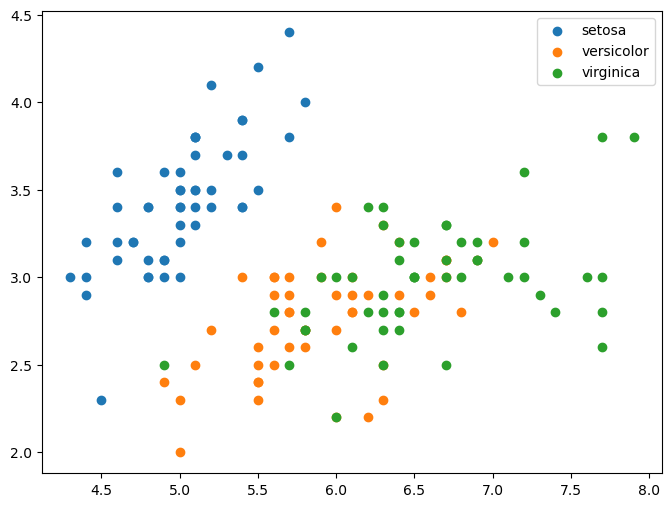

In [19]:
X = iris.data[:, :2]
y = iris.target

names = iris.target_names
print(names)
plt.figure(figsize = (8, 6))
for i in range(len(names)):
    plt.scatter(X[y == i, 0], X[y==i, 1], label = names[i])
    
plt.legend()
plt.show()

In [30]:
iris_data = load_iris()
iris_data

#iris.target는 어떤 타입으로 되어있는 지 확인
iris_label = iris.target
print(type(iris_label)) #numpy.ndarray
print(iris_label.shape)
iris_label #정답레이블

<class 'numpy.ndarray'>
(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
print(f"iris target 명 : {iris.target_names}")
#target : 분류 문제 레이블 값, 회귀 문제 숫자 결과값 데이터 셋
#target_names : 개별 레이블 이름

iris target 명 : ['setosa' 'versicolor' 'virginica']


In [33]:
#붓꽃데이터를 DataFrame으로 변환
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris_label
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [35]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [38]:
#결측값 확인
iris_df.isnull() #정상데이터면 False, 결측값인 경우 Null True
iris_df.isnull().sum() #각 열의 결측값의 개수를 계산
#유효값이기 때문에 결측값이 없음을 확인

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [41]:
#중복데이터 확인
iris_df.duplicated() #동일한 샘플이 중복되어서 존재하는지 여부, 중복시 True, 아니면 False
iris_df.duplicated().sum() #개수 확인

#실제 어느 행에 중복된 데이터가 있는지 확인
iris_df.loc[iris_df.duplicated(), : ]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
142,5.8,2.7,5.1,1.9,2


In [46]:
#컬럼명 수정
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
iris_df


,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
#어떤 데이터 행끼리 중복인지 확인
iris_df.loc[(iris_df.sepal_length == 5.8)&(iris_df.petal_width ==2.4), :] 

,sepal_length,sepal_width,petal_length,petal_width,label
114,5.8,2.8,5.1,2.4,2


In [47]:
#중복데이터 제거
iris_df = iris_df.drop_duplicates()
iris_df.loc[(iris_df.sepal_length == 5.8)&(iris_df.petal_width ==2.4), :] 

,sepal_length,sepal_width,petal_length,petal_width,label
114,5.8,2.8,5.1,2.4,2


In [48]:
iris_df
#149행

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [49]:
#컬럼별 상관관계 확인(-1~1사이의 값)
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width,label
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
label,0.786971,-0.422987,0.949402,0.956514,1.000000


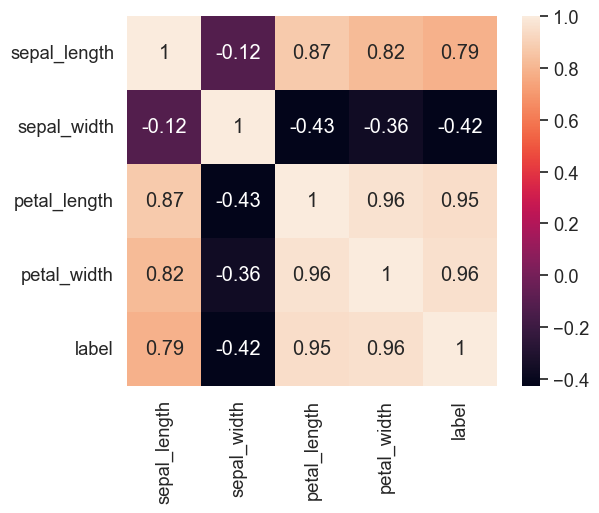

In [55]:
#데이터 시각화
import seaborn as sns
sns.set(font_scale = 1.2)

#상관계수 히트맵
sns.heatmap(data = iris_df.corr(), square =True, annot = True, cbar = True)
plt.show()

In [56]:
#label 값의 분포
iris_df['label'].value_counts()

label
0    50
1    50
2    49
Name: count, dtype: int64

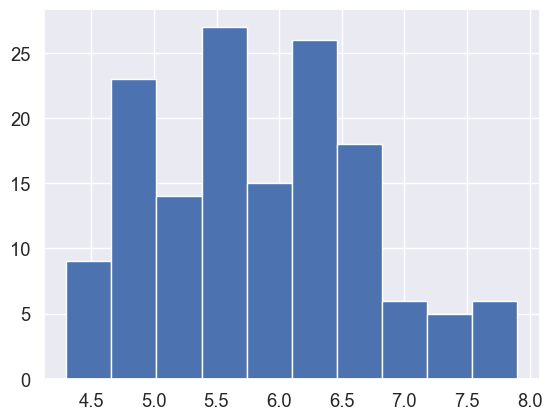

In [57]:
plt.hist(data = iris_df, x = 'sepal_length')
plt.show()

C:\Users\KOREA_IT\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


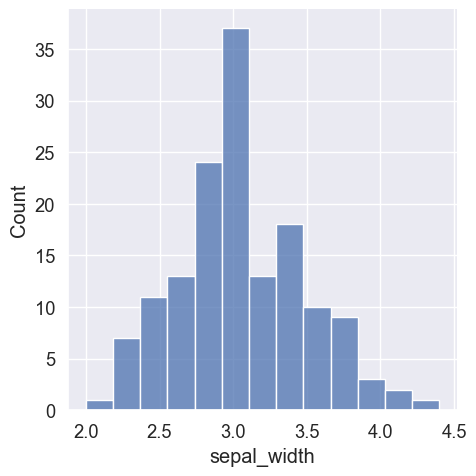

In [59]:
sns.displot(data = iris_df, x = "sepal_width", kind = 'hist')
plt.show()

C:\Users\KOREA_IT\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


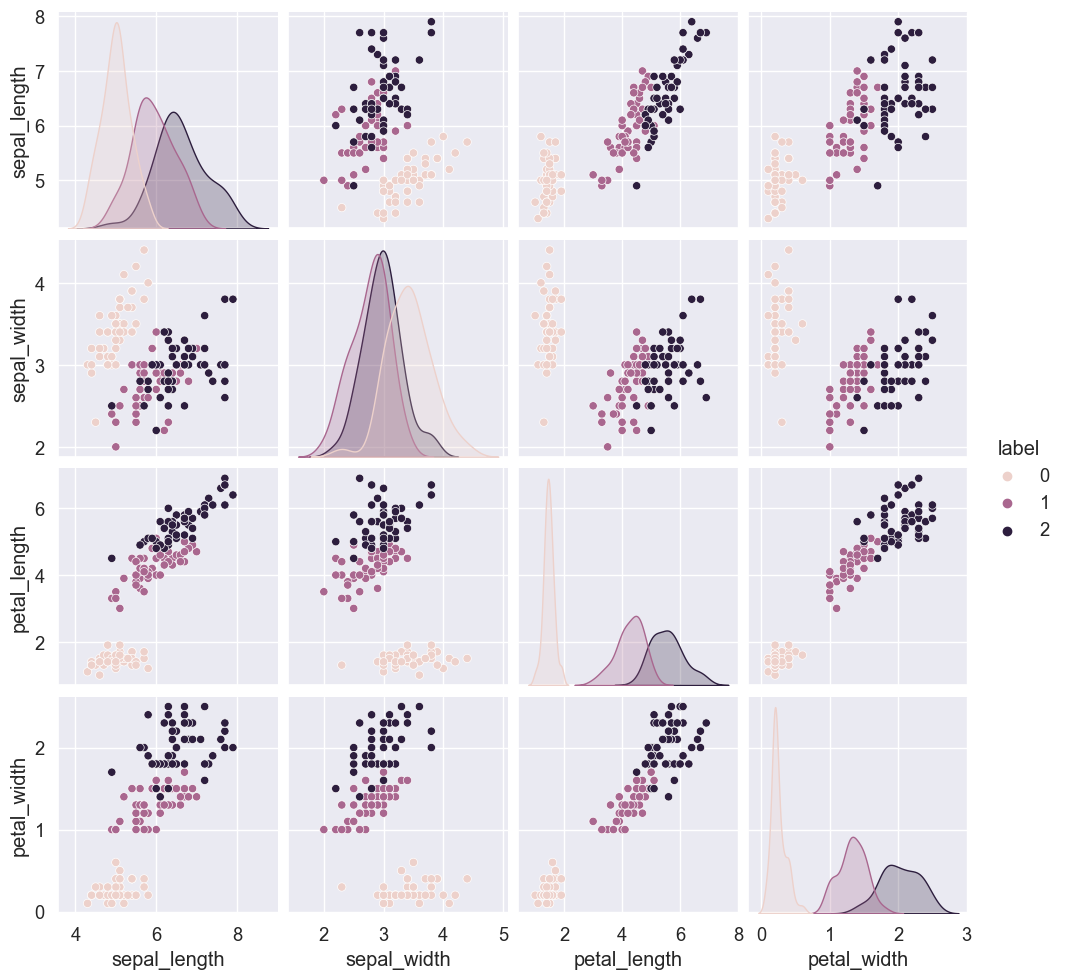

In [60]:
sns.pairplot(iris_df, hue = 'label', height = 2.5, diag_kind = "kde")
#kde : 밀도 추정 그래프
plt.show()

# Train, Test 데이터 셋 분할

In [70]:
iris_df
X_data = iris_df.loc[:, 'sepal_length':'petal_width']
y_data = iris_df.loc[:, 'label']

X_data
y_data

#학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                test_size = 0.2, shuffle = True, random_state = 42)

#학습데이터셋
print(X_train.shape, X_test.shape)

#테스트데이터셋
print(y_train.shape, y_test.shape)

y_train

(119, 4) (30, 4)
(119,) (30,)


22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: label, Length: 119, dtype: int32

In [71]:
#비율 확인
print(np.unique(y_train, return_counts = True)) #훈련데이터의 클래스 레이블 분포 확인
print(np.unique(y_test, return_counts = True)) #테스트데이터의 클래스 레이블 분포 확인

(array([0, 1, 2]), array([40, 41, 38], dtype=int64))
(array([0, 1, 2]), array([10,  9, 11], dtype=int64))


In [78]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                test_size = 0.2, random_state = 7,
                                    stratify = iris.target)
# stratify : 클래스 비율을 유지하기 위한 옵션

#비율 확인
print(np.unique(y_train, return_counts = True)) #훈련데이터의 클래스 레이블 분포 확인
print(np.unique(y_test, return_counts = True)) #테스트데이터의 클래스 레이블 분포 확인

y_train
y_test

(array([0, 1, 2]), array([40, 40, 40], dtype=int64))
(array([0, 1, 2]), array([10, 10, 10], dtype=int64))


array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 2, 1, 0, 2])

# 모델 생성

In [80]:
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree
#알고리즘 모델 초기화시 사용 random_state
#무작위성을 제어하기 위해서 모델을 생성할 때 설정하고 동일한 하이퍼파라미터와 
#데이터에 대해 항상 같은 모델이 생성됨

DecisionTreeClassifier(random_state=42)

# 모델 학습

In [81]:
decision_tree.fit(X_train, y_train)
#X_train : 학습 데이터 특성(꽃받침 길이와 폭)
#y_train : 학습 데이터의 레이블(품종)

DecisionTreeClassifier(random_state=42)

In [83]:
y_pred = decision_tree.predict(X_test)

#X_test는 테스트 데이터의 특성(길이와 폭)
#학습된 테스트 데이터의 예측값을 나타냄, y_pred 예측된 품종 레이블이 저장됨
y_pred

array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 1, 1, 0, 2])

In [84]:
y_test

array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 2, 1, 0, 2])

# 모델 평가(정확도)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 : {accuracy}")

정확도 : 0.9333333333333333
